In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16, EfficientNetB0, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import scipy
from scipy.io import loadmat
import numpy as np

import matplotlib.pyplot as plt


tf.random.set_seed(123)

import warnings
warnings.filterwarnings("ignore")

In [115]:
img_size = (224, 224)
batch_size = 32
epochs = 50
learning_rate = 1e-4

In [133]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased from 20
    width_shift_range=0.3,  # Increased from 0.2
    height_shift_range=0.3,  # Increased from 0.2
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)
gen_train_data = train_datagen.flow_from_directory(
    "/Users/tirthpatel/Desktop/DL/xray_dataset_covid19/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
gen_test_data = test_datagen.flow_from_directory(
    "/Users/tirthpatel/Desktop/DL/xray_dataset_covid19/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.


Found 40 images belonging to 2 classes.


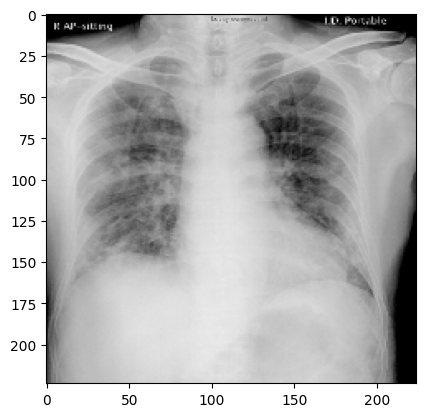

In [134]:
# plt.imshow(list(gen_train_data)[0][0][0].numpy().astype('uint8'))
plt.imshow(gen_test_data[0][0][0], cmap="gray")

In [135]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=img_size+(3,))

for layer in base_model.layers:
    layer.trainable = False

In [136]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

In [137]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
 6 (GlobalAveragePooling2D)                                      
                                                                 
 dense_33 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [138]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
checkpoint = ModelCheckpoint(
    filepath='best_model1.h5',
    monitor='val_loss',
    save_best_only=True
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [140]:
history = model.fit(gen_train_data, epochs=epochs, validation_data=gen_test_data, callbacks=[checkpoint, early_stopping], verbose=1)

Epoch 1/50
5/5 [==============================] - 13s 2s/step - loss: 0.6477 - accuracy: 0.6419 - val_loss: 0.6539 - val_accuracy: 0.5250
Epoch 2/50
5/5 [==============================] - 5s 857ms/step - loss: 0.5316 - accuracy: 0.7905 - val_loss: 0.5246 - val_accuracy: 0.7750
Epoch 3/50
5/5 [==============================] - 5s 903ms/step - loss: 0.4841 - accuracy: 0.8176 - val_loss: 0.4669 - val_accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 4s 779ms/step - loss: 0.4414 - accuracy: 0.8514 - val_loss: 0.3942 - val_accuracy: 0.8500
Epoch 5/50
5/5 [==============================] - 4s 765ms/step - loss: 0.3611 - accuracy: 0.8986 - val_loss: 0.3488 - val_accuracy: 0.8500
Epoch 6/50
5/5 [==============================] - 5s 923ms/step - loss: 0.3437 - accuracy: 0.8446 - val_loss: 0.3152 - val_accuracy: 0.8750
Epoch 7/50
5/5 [==============================] - 5s 924ms/step - loss: 0.3451 - accuracy: 0.8784 - val_loss: 0.2969 - val_accuracy: 0.8500
Epoch 8/50
5/5 [======

In [141]:
loss, acc = model.evaluate(gen_train_data)
print(f'On Training data :- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
loss, acc = model.evaluate(gen_test_data)
print(f'On Testing data :- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')

5/5 [==============================] - 5s 1s/step - loss: 0.1221 - accuracy: 0.9459
On Training data :- Loss: 0.122, Accuracy: 94.595%
2/2 [==============================] - 1s 51ms/step - loss: 0.1939 - accuracy: 0.9250
On Testing data :- Loss: 0.194, Accuracy: 92.5%


In [142]:
def ploty(history):
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'])
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])

    plt.show()

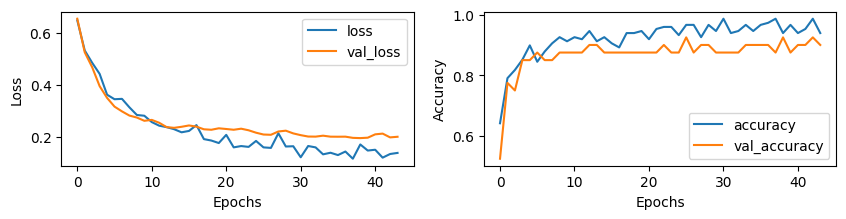

In [143]:
ploty(history)

In [144]:
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model2 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model4 = ResNet50(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model5 = DenseNet121(weights='imagenet', include_top=False, input_shape=img_size + (3,))
all_base_models = [base_model1, base_model2, base_model3, base_model4, base_model5]
model_names = ['MobileNetV2', 'EfficientNetB0', 'VGG16', 'ResNet50', 'DenseNet121']

Training MobileNetV2


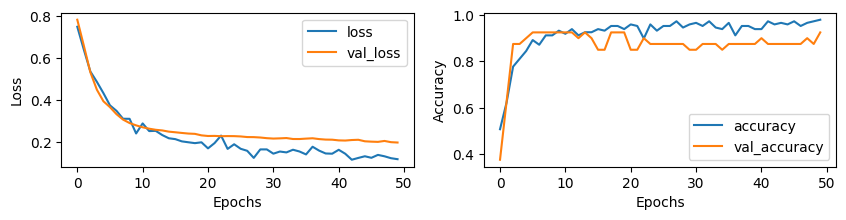

On TrainData --- Loss: 0.118, Accuracy: 97.973%
On TestData --- Loss: 0.196, Accuracy: 92.5%
**************************************************
Training EfficientNetB0


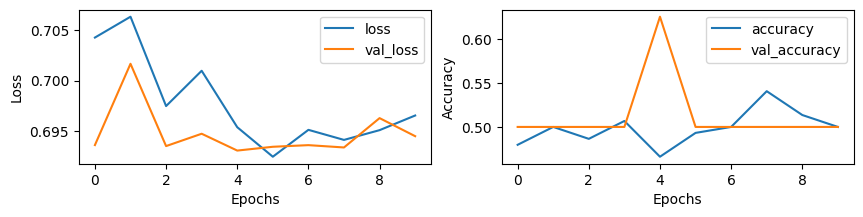

On TrainData --- Loss: 0.693, Accuracy: 47.973%
On TestData --- Loss: 0.693, Accuracy: 62.5%
**************************************************
Training VGG16


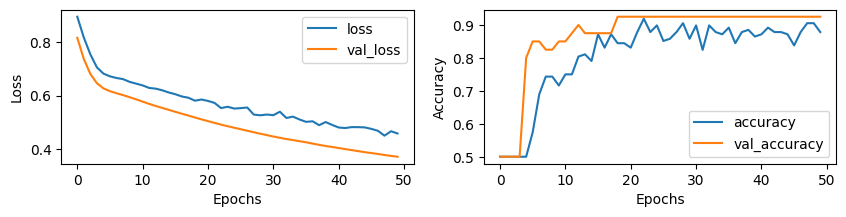

On TrainData --- Loss: 0.472, Accuracy: 87.838%
On TestData --- Loss: 0.371, Accuracy: 92.5%
**************************************************
Training ResNet50


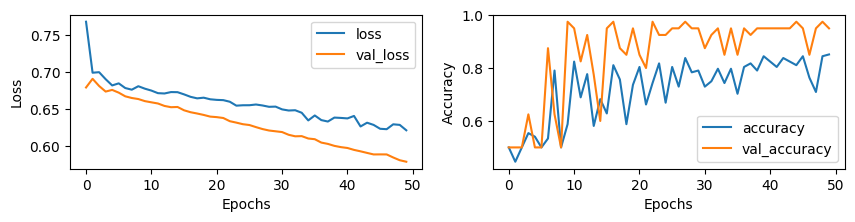

On TrainData --- Loss: 0.615, Accuracy: 86.486%
On TestData --- Loss: 0.578, Accuracy: 95.0%
**************************************************
Training DenseNet121


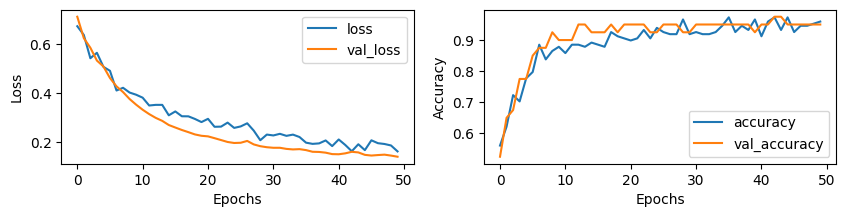

On TrainData --- Loss: 0.175, Accuracy: 94.595%
On TestData --- Loss: 0.14, Accuracy: 95.0%
**************************************************


In [146]:
for base_model in all_base_models:
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(f'Training {model_names[all_base_models.index(base_model)]}')
    history = model.fit(gen_train_data, epochs=epochs, validation_data=gen_test_data, callbacks=[checkpoint, early_stopping], verbose=0)
    ploty(history)
    loss, acc = model.evaluate(gen_train_data, verbose=0)
    print(f'On TrainData --- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
    loss, acc = model.evaluate(gen_test_data, verbose=0)
    print(f'On TestData --- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
    print('*'*50)